In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sct

In [5]:
data = pd.read_csv("./chapter2.csv").n

In [6]:
data.head()

0    2
1    2
2    4
3    6
4    4
Name: n, dtype: int64

In [17]:
len(data)

50

In [18]:
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
Name: n, dtype: float64

In [19]:
np.histogram(data, bins=7)

(array([ 1,  3, 11, 12, 10,  5,  8]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]))

(array([  1.,   3.,  11.,  12.,  10.,   5.,   4.,   4.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

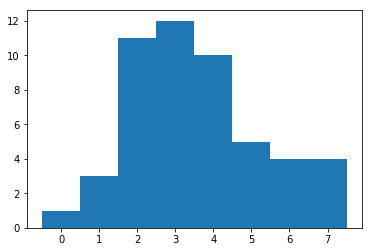

In [20]:
plt.hist(data,bins=np.arange(-0.5,8.5,1))

### sample variation

In [24]:
data.var(ddof=0) # 標本分散

2.9264000000000006

In [27]:
data.var(ddof=1) # 不偏分散

2.9861224489795921

In [28]:
np.var(data) # 標本分散

2.9264000000000006

In [29]:
np.var(data,ddof=1) # 不偏分散

2.9861224489795921

### standard deviation

In [22]:
data.std()

1.7280400600042789

In [23]:
np.sqrt(data.var())

1.7280400600042789

### ポアソン分布

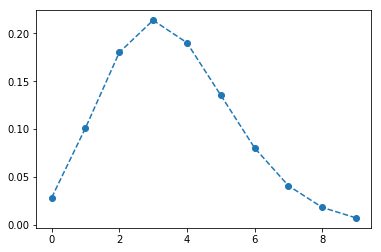

In [3]:
y = range(10)
prob = sct.poisson.pmf(y,mu=3.56)
plt.plot(y,prob,"o--")

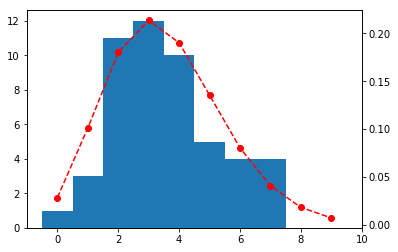

In [7]:
fig,ax1=plt.subplots()

ax1.hist(data,bins=[i-0.5 for i in range(11)])
ax2=ax1.twinx()
ax2.plot(y,prob,"ro--")

plt.show()

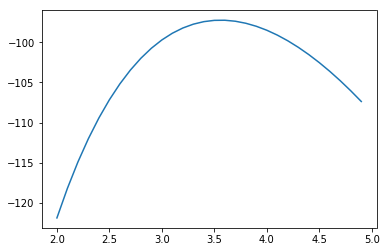

In [8]:
## 最尤推定
logL = lambda m: sum(sct.poisson.logpmf(data,m))
x = np.arange(2,5,0.1)
logL_list = [logL(m) for m in x]
plt.plot(x,logL_list)

(array([  2.,   6.,  10.,  11.,  11.,   6.,   2.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Patch objects>)

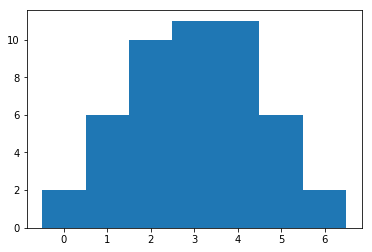

In [9]:
a =np.random.poisson(lam=3.5,size=50)
d = pd.Series(a)
plt.hist(d,bins=np.arange(d.max())-0.5)

In [10]:
d.mean()

3.2000000000000002

In [11]:
count = list()
for _ in range(3000):
    a = np.random.poisson(lam=3.5,size=50)
    count.append(a.mean())

(0, 1500)

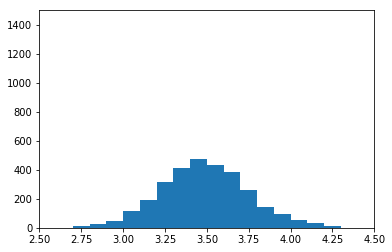

In [12]:
plt.hist(count,bins=np.arange(2.5,4.5,0.1))
plt.xlim(2.5,4.5)
plt.ylim(0,1500)

(0, 1500)

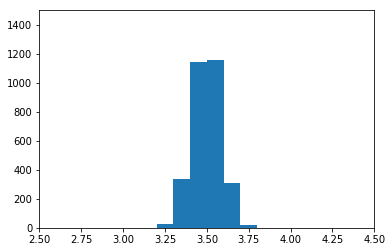

In [13]:
count = list()
for i in range(3000):
    a = np.random.poisson(lam=3.5,size=500)
    count.append(a.mean())
    
plt.hist(count,bins=np.arange(2.5,4.5,0.1))
plt.xlim(2.5,4.5)
plt.ylim(0,1500)